In [1]:
## importing modules:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from os.path import join
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

In [2]:
## importing the data
with open(join('/Users/aidanpayne/Documents/GitHub/Codecademy-Portfolio-Projects', 'Datasets', 'all_data_gdp.csv'), 'rU') as file:
    df = pd.read_csv(file)
df

<ipython-input-2-18265866e8bb>:2: DeprecationWarning: 'U' mode is deprecated
  with open(join('/Users/aidanpayne/Documents/GitHub/Codecademy-Portfolio-Projects', 'Datasets', 'all_data_gdp.csv'), 'rU') as file:


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [3]:
## df summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
## editing data
df = df.replace('United States of America', 'USA')
country = list(df['Country'].unique())
country

def change_gdp(x):
    return x/10000000000000

df['GDP'] = df['GDP'].apply(change_gdp)

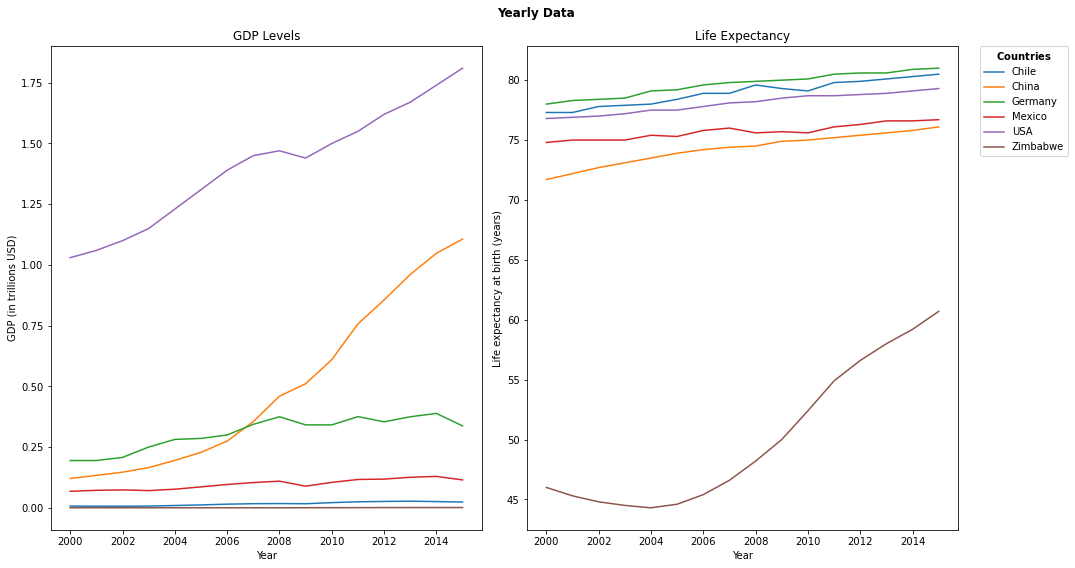

<Figure size 432x288 with 0 Axes>

In [5]:
## plotting yearly data
f, axs = plt.subplots(figsize=(15, 8))

ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.title('GDP Levels')
plt.ylabel('GDP (in trillions USD)')
ax1.get_legend().remove()

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.title('Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=r'$\bf{Countries}$')

plt.suptitle('Yearly Data', fontweight='bold')
plt.tight_layout()
plt.savefig('/Users/aidanpayne/Documents/GitHub/Codecademy-Portfolio-Projects/Plots/Yearly data - GDP_LE.png')
plt.show()
plt.cla()
plt.clf()

From the graphs above, the USA has the highest GDP while Chile has the highest life expectancy, where both were consistant. Zimbabwe has the lowest for both.

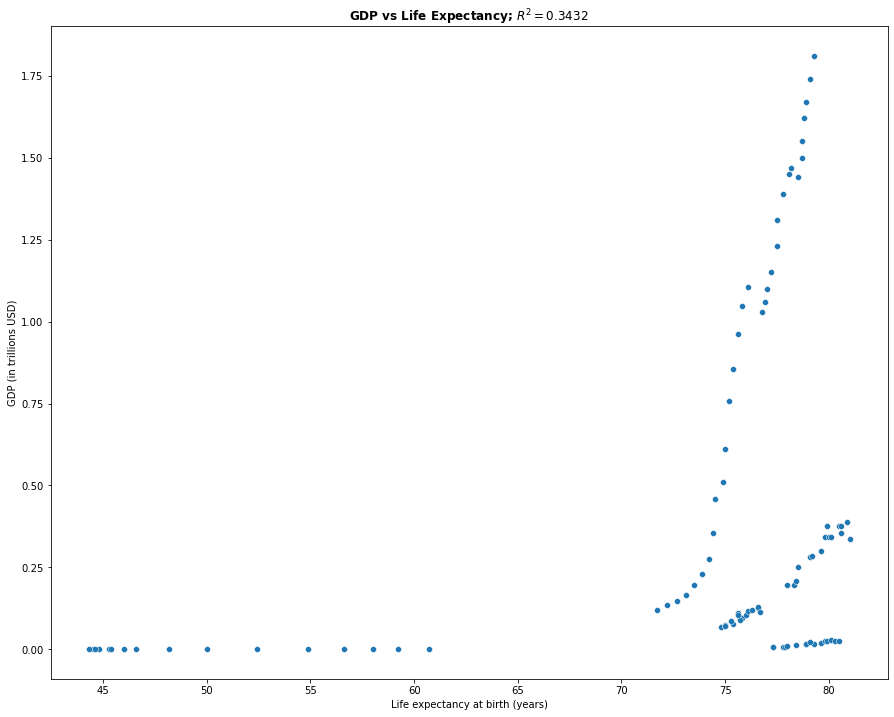

<Figure size 432x288 with 0 Axes>

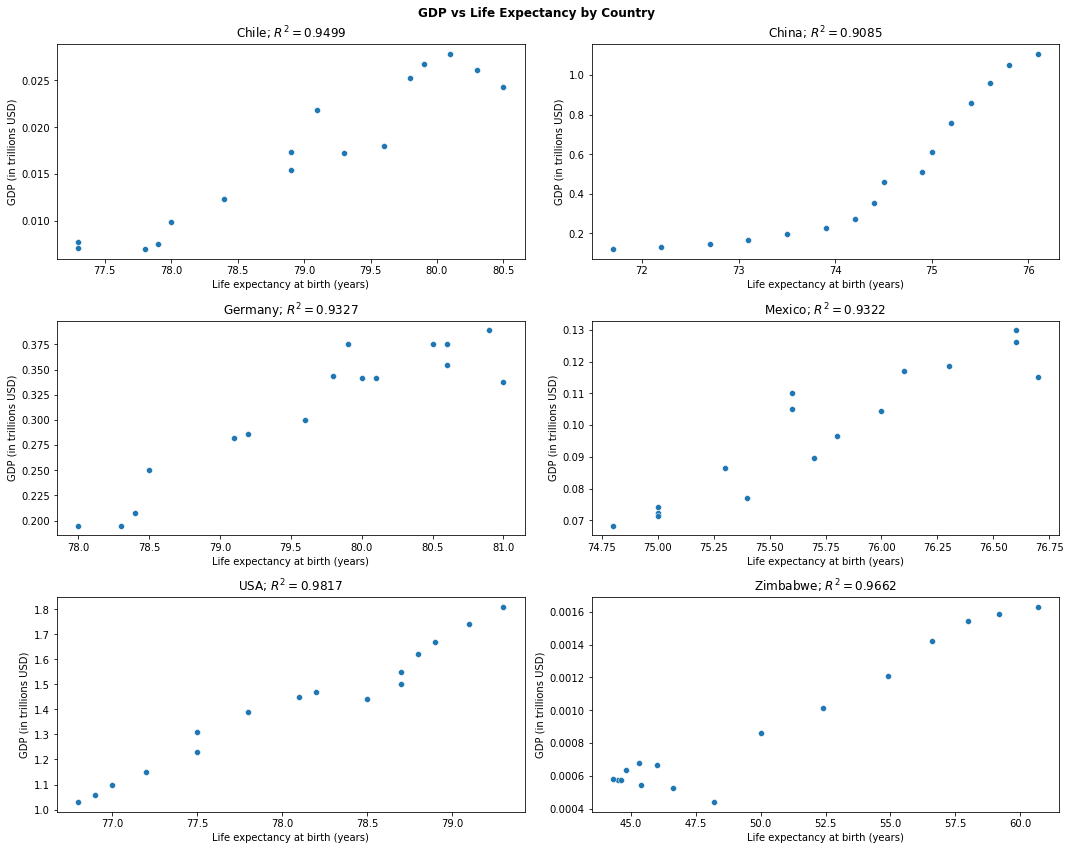

<Figure size 432x288 with 0 Axes>

In [6]:
## plotting life expectancy vs GDP
f, axs = plt.subplots(figsize=(15, 12))

corr, _ = pearsonr(df['GDP'], df['Life expectancy at birth (years)'])

ax1 = plt.subplot()
sns.scatterplot(data=df, x='Life expectancy at birth (years)', y='GDP')
plt.title(f'GDP vs Life Expectancy; $R^{2} = {corr:.4f}$', fontweight='bold')
plt.ylabel('GDP (in trillions USD)')
plt.savefig('/Users/aidanpayne/Documents/GitHub/Codecademy-Portfolio-Projects/Plots/GDP vs LE.png')
plt.show()
plt.cla()
plt.clf()

f, axs = plt.subplots(figsize=(15, 12))

for i in range(len(country)):
    data = df[df['Country'] == country[i]]
    corr, _ = pearsonr(data['GDP'], data['Life expectancy at birth (years)'])
    ax1 = plt.subplot(3, 2, i+1)
    sns.scatterplot(data=data, x='Life expectancy at birth (years)', y='GDP')
    plt.title(f'{country[i]}; $R^{2} = {corr:.4f}$')
    plt.ylabel('GDP (in trillions USD)')

plt.suptitle('GDP vs Life Expectancy by Country', fontweight='bold')
plt.tight_layout()
plt.savefig('/Users/aidanpayne/Documents/GitHub/Codecademy-Portfolio-Projects/Plots/GDP vs LE by Country.png')
plt.show()
plt.cla()
plt.clf()

In [7]:
## create file list

png_count = 360
files = []
for i in range(png_count):
    file_names = f'3d_vis{i}.png'
    files.append(file_names)

In [8]:
## create 3D plot:

for i in range(len(country)):
    for angle in range(0, 360):
        f, axs = plt.subplots(figsize=(15, 12))
        data = df[df['Country'] == country[i]]
        x = data['Year']
        y = data['GDP']
        z = data['Life expectancy at birth (years)']
        ax = plt.subplot(1, 1, 1, projection='3d')
        ax.scatter(x, y, z)
        plt.title(country[i])
        ax.set_xlabel('Year')
        ax.set_ylabel('GDP (in trillions USD)')
        ax.set_zlabel('Life Expectancy')
        
        # make panel color white
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

        # make grid color white
        ax.xaxis._axinfo['grid']['color'] = (1, 1, 1, 0)
        ax.yaxis._axinfo['grid']['color'] = (1, 1, 1, 0)
        ax.zaxis._axinfo['grid']['color'] = (1, 1, 1, 0)
        
        # adjust view
        ax.view_init(60, angle)
        
        # save figure
        filename = f'/Users/aidanpayne/Documents/GitHub/Codecademy-Portfolio-Projects/Plots/3D Plots/{country[i]}/3d_vis{angle}.png'
        plt.savefig(filename)

        plt.clf()
        plt.cla()
        plt.close()


In [12]:
## create the frames

for i in range(len(country)):
    frames = []
    for j in files:
        new_frame = Image.open(f'/Users/aidanpayne/Documents/GitHub/Codecademy-Portfolio-Projects/Plots/3D Plots/{country[i]}/{j}')
        frames.append(new_frame)
    
    # save into a GIF
    frames[0].save(f'/Users/aidanpayne/Documents/GitHub/Codecademy-Portfolio-Projects/Plots/3D Plots/{country[i]}/video/3d_vis_{country[i]}.gif', format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=80, loop=0)



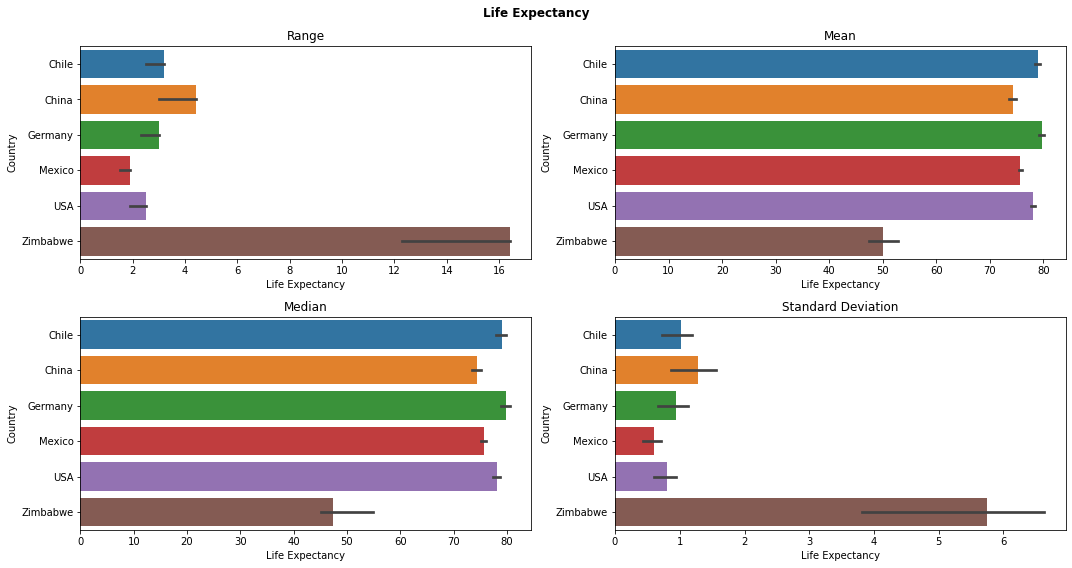

<Figure size 432x288 with 0 Axes>

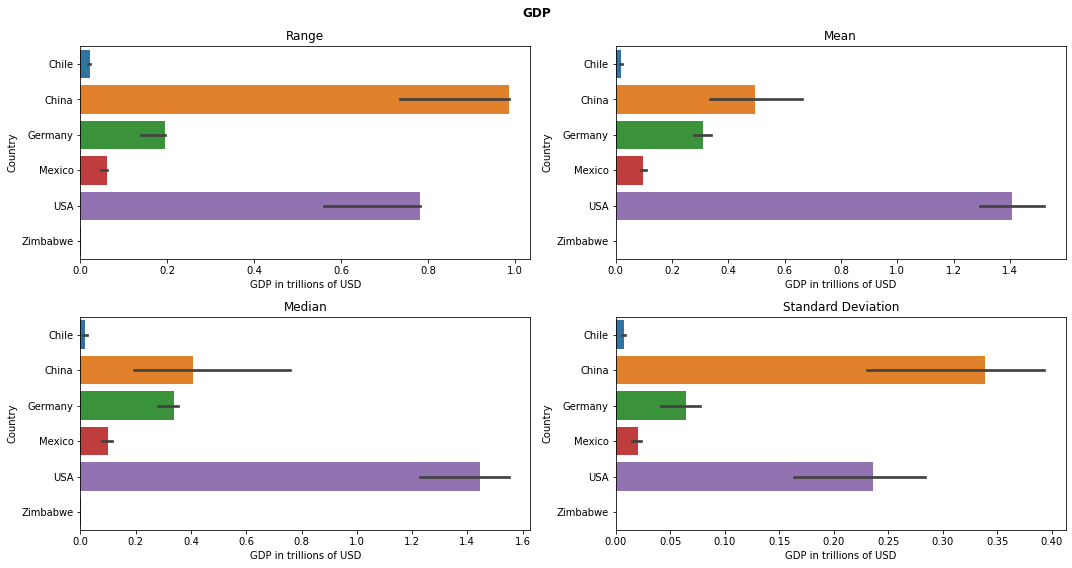

<Figure size 432x288 with 0 Axes>

In [10]:
## plotting bar charts

x_labels = ['Life Expectancy', 'GDP in trillions of USD']
title = ['Life Expectancy', 'GDP']
df_cols = ['Life expectancy at birth (years)', 'GDP']

for i in range(len(x_labels)):
    f, axs = plt.subplots(figsize=(15, 8))

    ax1 = plt.subplot(2, 2, 1)
    sns.barplot(data=df, x=df_cols[i], y='Country', estimator=np.ptp)
    plt.xlabel(x_labels[i])
    plt.title('Range')

    ax2 = plt.subplot(2, 2, 2)
    sns.barplot(data=df, x=df_cols[i], y='Country', estimator=np.mean)
    plt.xlabel(x_labels[i])
    plt.title('Mean')

    ax3 = plt.subplot(2, 2, 3)
    sns.barplot(data=df, x=df_cols[i], y='Country', estimator=np.median)
    plt.xlabel(x_labels[i])
    plt.title('Median')

    ax4 = plt.subplot(2, 2, 4)
    sns.barplot(data=df, x=df_cols[i], y='Country', estimator=np.std)
    plt.xlabel(x_labels[i])
    plt.title('Standard Deviation')

    plt.suptitle(title[i], fontweight='bold')
    plt.tight_layout()
    
    plt.savefig(f'/Users/aidanpayne/Documents/GitHub/Codecademy-Portfolio-Projects/Plots/Bar Plots of {title[i]}.png')

    plt.show()
    plt.cla()
    plt.clf()